## Check if output data looks reasonable

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib notebook

In [4]:
# Output of simulation

# Idealized data
ds_ideal = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-3D_DOM01_ML_0001.nc')

# reference data
ds_ref = xr.open_dataset('../../../../out/reference_1712_1812/FIONA-3D_DOM01_ML_0001.nc')



In [5]:
print(ds.clon.max()*180/np.pi)
print(ds.clon.min()*180/np.pi)
print(ds.clat.max()*180/np.pi)
print(ds.clat.min()*180/np.pi)


r_earth = 6371
km = 1.25
deg = 0.012

find_km = deg * np.pi/180 *r_earth
find_deg = km * 180 /(np.pi * r_earth) 
print(find_km, find_deg)

lon_nsteps = (ds.clon.min()*180/np.pi - ds.clon.max()*180/np.pi) / 0.018
lat_nsteps = (ds.clat.max()*180/np.pi - ds.clat.min()*180/np.pi) / 0.012

print(lon_nsteps, lat_nsteps)


NameError: name 'ds' is not defined

In [6]:
u = ds.u.where(ds.u!=-9.99e-08, drop = True )

NameError: name 'ds' is not defined

<IPython.core.display.Javascript object>


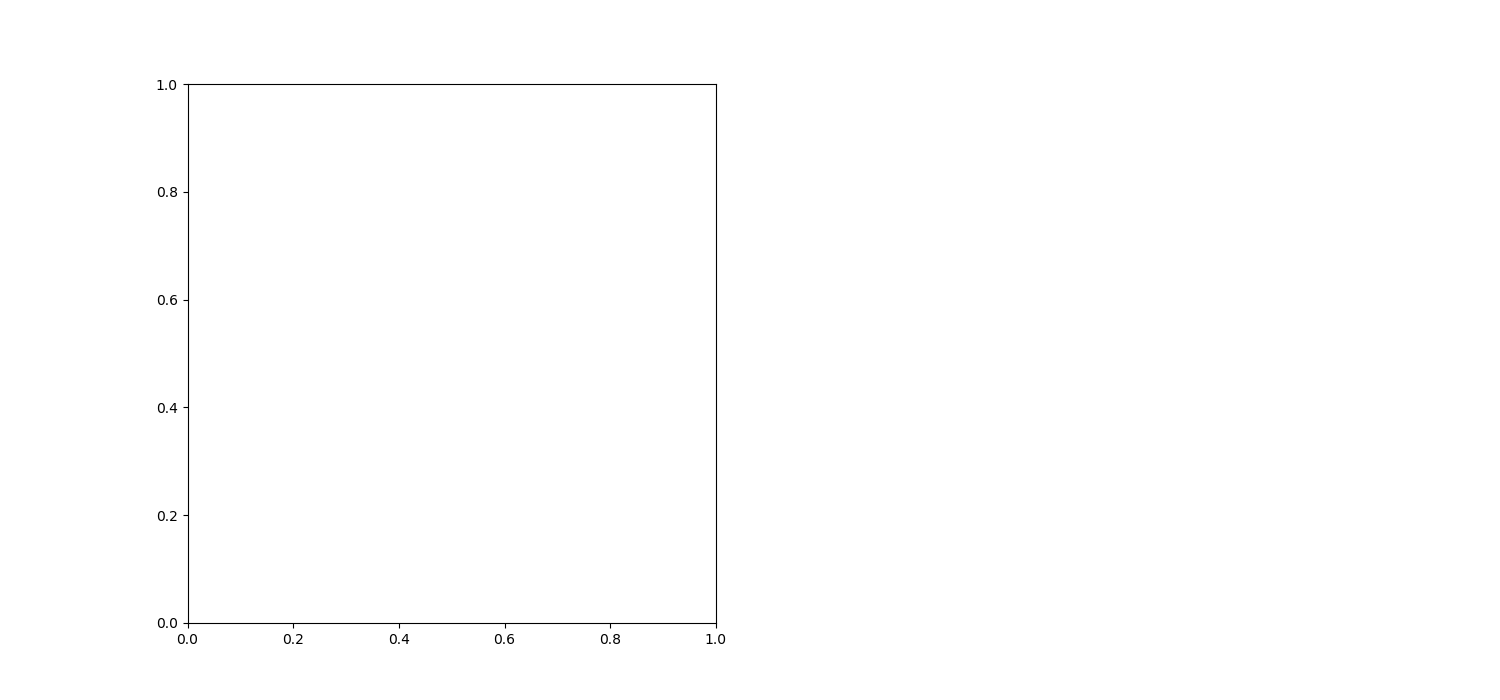

NameError: name 'ds' is not defined

In [7]:
plt.figure(figsize=(15,7))
plt.subplot(121)
#u.isel(time=1, height=89).plot()
plt.tripcolor(ds.clon, ds.clat, ds.u.isel(time=0, height = 73))
#plt.clim([-15,15])
plt.colorbar()

plt.subplot(122)
plt.tripcolor(ds_init.clon, ds_init.clat, ds_init.u.isel(time=0, height = 60))
plt.colorbar()

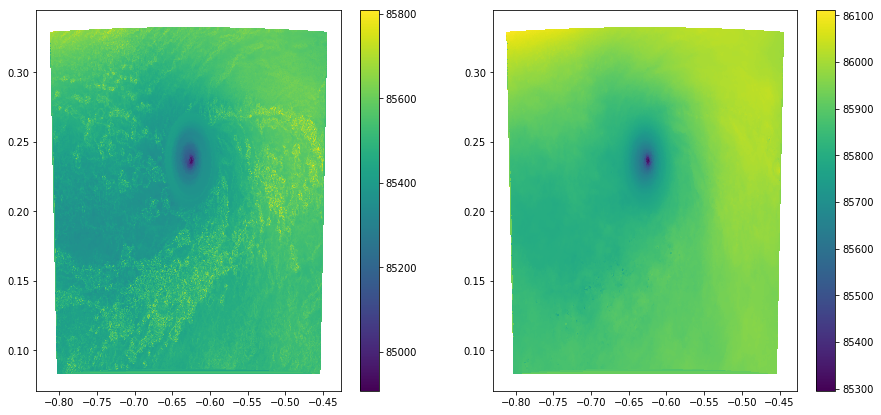

In [5]:
plt.figure(figsize=(15,7))
plt.subplot(121)
#u.isel(time=1, height=89).plot()
plt.tripcolor(ds.clon, ds.clat, ds.pres.isel(time=0, height = 73))
#plt.clim([-15,15])
plt.colorbar()

plt.subplot(122)
plt.tripcolor(ds_init.clon, ds_init.clat, ds_init.pres.isel(time=0, height = 60))
plt.colorbar()

<xarray.Dataset>
Dimensions:        (bnds: 2, height: 90, height_2: 91, height_3: 91, ncells: 2469998, time: 2, vertices: 3)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-17T12:00:00 2016-08-17T12:10:00
    clon           (ncells) float32 -0.80234563 -0.8023519 ... -0.44620237
    clat           (ncells) float32 0.08349012 0.08366188 ... 0.32778716
  * height         (height) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_2       (height_2) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * height_3       (height_3) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Dimensions without coordinates: bnds, ncells, vertices
Data variables:
    clon_bnds      (ncells, vertices) float32 ...
    clat_bnds      (ncells, vertices) float32 ...
    height_bnds    (height, bnds) float64 ...
    height_3_bnds  (height_3, bnds) float64 ...
    u              (time, height, ncells) float32 ...
    v              (time, height, ncells) float32 ...
    w              (time, height_2, ncells) float32 ...
    rh             (time, height, ncells) float32 ...
    temp           (time, height, ncells) float32 ...
    clc            (time, height, ncells) float32 ...
    geopot         (time, height, ncells) float32 ...
    qv             (time, height, ncells) float32 ...
    qc             (time, height, ncells) float32 ...
    qr             (time, height, ncells) float32 ...
    qi             (time, height, ncells) float32 ...
    qs             (time, height, ncells) float32 ...
    rho            (time, height, ncells) float32 ...
    pv             (time, height, ncells) float32 ...
    z_ifc          (height_3, ncells) float32 ...
    theta_v        (time, height, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          70554a06-ee52-11e8-85ba-61ba733eb070
    uuidOfVGrid:          9e236da2-70b7-518e-fb27-3f337d5d1f80
    title:                ICON simulation
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               git@git.mpimet.mpg.de:icon.git@f7aa6f434b2d155f6cd6...
    history:              /scratch/usr/bekthkis/ICON_08_2019/icon_gcc/build/x...
    references:           see MPIM/DWD publications
    comment:              bekthkis (bekthkis) on gcn1001 (Linux 3.10.0-1062.9...

In [63]:
# Create plot of level

plt.figure()
plt.tripcolor(ds.lon, ds.lat, ds.temp.isel( time=0, height=70), cmap='coolwarm')
plt.title('Temperature in 20m')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([295,301])
cbar = plt.colorbar() 
cbar.ax.set_ylabel('Temp in K')

AttributeError: 'Dataset' object has no attribute 'lon'

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


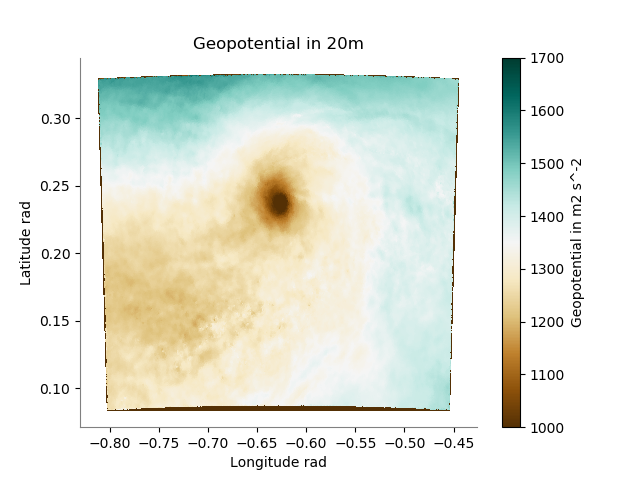

Text(0, 0.5, 'Geopotential in m2 s^-2')

In [36]:
# Create plot of level
plt.figure()
plt.tripcolor(ds.clon, ds.clat, ds.geopot.isel( time=1, plev=-1), cmap='BrBG')
plt.title('Geopotential in 20m')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([1000,1650])
cbar = plt.colorbar() 
cbar.ax.set_ylabel('Geopotential in m2 s^-2')

/sw/tools/python/anaconda3/2019.03/skl/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, ' m s^-1')

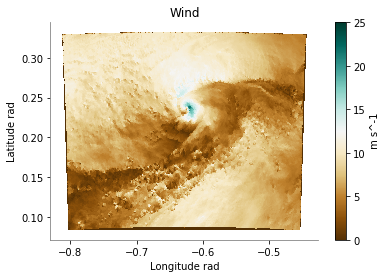

In [62]:
# Create plot of level
wind = np.sqrt(ds.u[1,-3]**2 + ds.v[1,-3]**2)

plt.tripcolor(ds.clon, ds.clat, wind, cmap='BrBG')
plt.title('Wind')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([0,25])
cbar = plt.colorbar() 
cbar.ax.set_ylabel(' m s^-1')

### Regular grid output



Maximum tangential wind.
Select several layers and compare the evolution with time.

Minimum Pressure at surface

In [8]:
ds_2d_ideal1 = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-2D_DOM01_ML_0001.nc')
ds_2d_ideal2 = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-2D_DOM01_ML_0002.nc')
ds_2d_ref1 = xr.open_dataset('../../../../out/reference_1712_1812/FIONA-2D_DOM01_ML_0001.nc')
ds_2d_ref2 = xr.open_dataset('../../../../out/reference_1712_1812/FIONA-2D_DOM01_ML_0002.nc')

In [9]:
# timesteps should be same for ref and ideal
timesteps = len(ds_2d_ideal1.time) + len(ds_2d_ideal2.time)
time = np.concatenate((ds_2d_ideal1.time,ds_2d_ideal2.time))
sim_min = np.linspace(0,1440,49)/60

min_pres_ideal = np.empty([timesteps,1])
min_pres_ref = np.empty([timesteps,1])


for t in range(0, timesteps):
    if t < len(ds_2d_ideal1.time):
        min_pres_ideal[t] = ds_2d_ideal1.pres_sfc[t].min()/100
        min_pres_ref[t] = ds_2d_ref1.pres_sfc[t].min()/100
    else:
        min_pres_ideal[t] = ds_2d_ideal2.pres_sfc[t-len(ds_2d_ideal1.time)].min()/100
        min_pres_ref[t] = ds_2d_ref2.pres_sfc[t-len(ds_2d_ideal1.time)].min()/100

In [13]:
min_best_track = [1007, 1007, 1007, 1006, 1006]
time_best_track = [0, 6, 12, 18, 24]

<IPython.core.display.Javascript object>


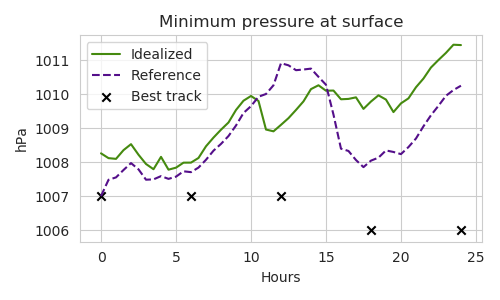

In [18]:
sns.set_style('whitegrid')

col1 = sns.hls_palette(8, l=.3, s=.8)[2]
col2 = sns.hls_palette(8, l=.3, s=.8)[6]

#violetish = sns.color_palette("cubehelix", 8)[5]


fig, ax = plt.subplots(figsize=(5,3))
ax.plot(sim_min, min_pres_ideal, color=col1, label="Idealized")
ax.plot(sim_min, min_pres_ref, color=col2, label="Reference", linestyle = '--')
ax.scatter(time_best_track, min_best_track, c='black', marker='x', label="Best track")

plt.legend()

plt.title('Minimum pressure at surface')
plt.xlabel('Hours')
plt.ylabel('hPa')

plt.tight_layout()


### Sea surface temperature


In [10]:
sst = ds_2d_ideal1.t_seasfc.isel(time=-1).values
lon = ds_2d_ideal1.lon
lat = ds_2d_ideal1.lat

In [12]:
sst.shape
lon.shape

(1112,)

<IPython.core.display.Javascript object>


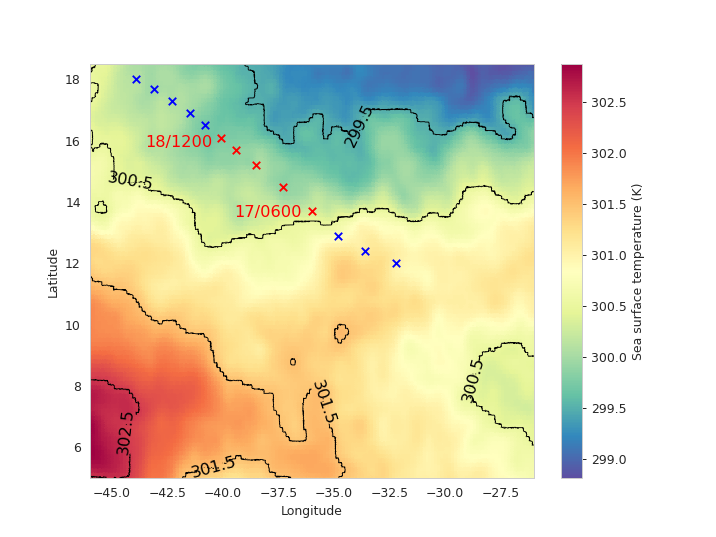

In [47]:
# set levels for cotours
levels = [ 299.5, 300.5, 301.5, 302.5]
strs = ['299.5', '300.5','301.5', '302.5']

fig, ax = plt.subplots(figsize=(8,6))
cmesh = plt.pcolormesh(lon,lat, sst, cmap="Spectral_r")
CS = ax.contour(lon,lat, sst, levels, linewidths=0.7, colors='k')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

cbar = plt.colorbar(cmesh, ax=ax)
cbar.ax.set_ylabel('Sea surface temperature (K)')

plt.text(x=-39.5, y=13.5, s='17/0600', fontsize=13, color='r')
plt.text(x=-43.5, y=15.8, s='18/1200', fontsize=13, color='r')

#plt.clabel(CS, inline=1)
ax.clabel(CS,fmt='%2.1f', inline=1, fontsize=13)
# best track center 
track_nosim_lon = [-32.2, -33.6, -34.8, -40.8, -41.5, -42.3, -43.1, -43.9]
track_nosim_lat = [12.0, 12.4, 12.9, 16.5, 16.9, 17.3, 17.7, 18.0]
best_track_lon = [-36, -37.3, -38.5, -39.4, -40.1]
best_track_lat = [ 13.7,14.5, 15.2, 15.7, 16.1]
plt.scatter(best_track_lon, best_track_lat, marker='x', color='red')
plt.scatter(track_nosim_lon, track_nosim_lat,  marker='x', color='blue' )